In [3]:
import numpy as np
import pandas as pd

To Read CSV Files

In [6]:
df = pd.read_csv('placement-dataset.csv')

To get an Overview

In [9]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [20]:
df.shape

(100, 4)

Preprocessing - Remove unwanted Coloumn

In [23]:
df = df.iloc[:,1:]

In [25]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


To see how data looks

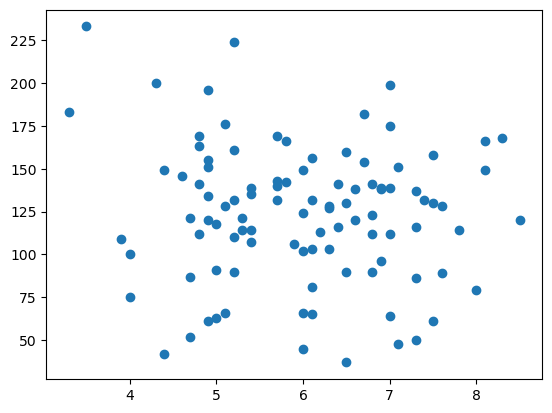

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'])

To get Placed Students

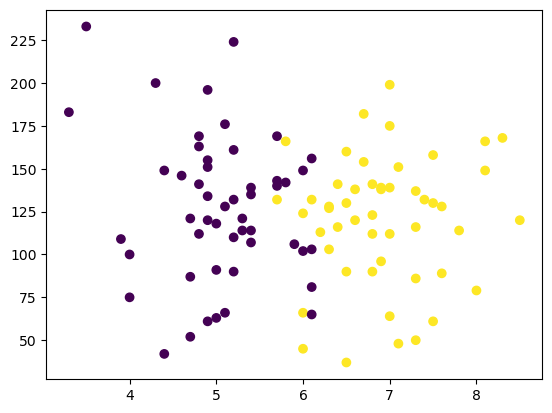

In [34]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

Dependent Variables in x

In [39]:
x = df.iloc[:, 0:2]
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


Independent Variables in y


In [44]:
y = df.iloc[:, -1]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [46]:
x.shape

(100, 2)

In [48]:
y.shape

(100,)

Train Test Split

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [57]:
x_train

,cgpa,iq
1,5.9,106.0
85,5.8,166.0
95,4.3,200.0
45,6.0,66.0
18,4.0,100.0
...,...,...
14,6.1,103.0
35,6.8,90.0
10,6.0,45.0
54,6.4,141.0


In [59]:
y_train

1     0
85    1
95    0
45    1
18    0
     ..
14    0
35    1
10    1
54    1
41    0
Name: placement, Length: 90, dtype: int64

In [61]:
x_test

,cgpa,iq
79,6.5,90.0
37,8.1,149.0
58,8.0,79.0
55,7.8,114.0
26,7.0,199.0
5,7.1,48.0
8,6.1,156.0
42,7.6,89.0
38,6.5,160.0
16,5.2,224.0


In [63]:
y_test

79    1
37    1
58    1
55    1
26    1
5     1
8     0
42    1
38    1
16    0
Name: placement, dtype: int64

For Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train


array([[ 0.01803959, -0.44317823],
       [-0.07215834,  1.14169756],
       [-1.42512731,  2.03979384],
       [ 0.10823752, -1.49976209],
       [-1.6957211 , -0.60166581],
       [-0.97413766, -0.28469065],
       [ 2.00239407,  1.14169756],
       [-0.61334593, -0.86581178],
       [-1.6957211 , -1.26203072],
       [-1.15453352,  0.61340563],
       [ 1.01021683, -1.55259129],
       [ 2.18278993,  1.19452675],
       [ 0.37883131,  0.13794289],
       [-1.33492938,  0.69264942],
       [-0.97413766,  0.48133265],
       [ 0.46902924, -0.17903227],
       [ 0.19843545, -1.52617669],
       [-0.88393972,  1.93413546],
       [-1.06433559, -0.04695928],
       [ 0.10823752,  0.69264942],
       [-0.16235628,  0.24360128],
       [-0.70354386, -1.49976209],
       [-0.88393972,  0.851137  ],
       [-1.06433559, -1.86956644],
       [ 0.19843545, -1.10354314],
       [ 0.9200189 , -0.7073242 ],
       [ 0.73962303,  0.8247224 ],
       [ 0.6494251 , -0.07337388],
       [-0.79374179,

In [78]:
x_test = scaler.transform(x_test)
x_test

array([[  6.5,  90. ],
       [  8.1, 149. ],
       [  8. ,  79. ],
       [  7.8, 114. ],
       [  7. , 199. ],
       [  7.1,  48. ],
       [  6.1, 156. ],
       [  7.6,  89. ],
       [  6.5, 160. ],
       [  5.2, 224. ]])


Train the Model

In [85]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

Evaluate the Model

In [88]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8


To Plot the Decision Boundary

<Axes: >

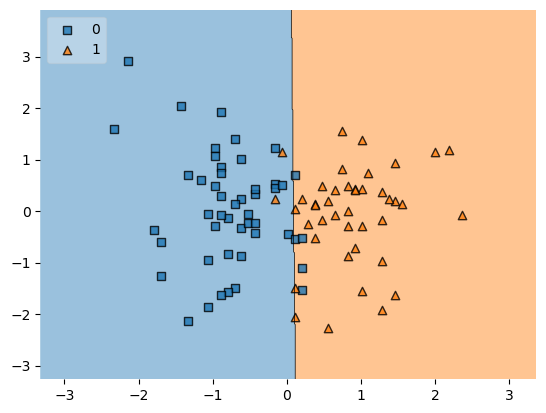

In [98]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)